In [1]:
import numpy as np
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model
import keras.backend as K
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
import random

Using TensorFlow backend.


In [2]:
print(K.image_data_format()) 
# expected output: channels_last

channels_last


In [3]:
model = load_model('model/train-checkpoint.h5')

In [4]:
firstTryDataset = np.load('basicStrategy5x4.npz')
x_train = firstTryDataset['x_train']
y_train = firstTryDataset['y_train']

print("original data:")
print(x_train[0])
print(y_train[0])
print(x_train.shape)
print(y_train.shape)


print("\nnormalized data:")
sp = x_train.shape
x_train = x_train.reshape((sp[0],sp[1],sp[2],1))
sp = y_train.shape
y_train = y_train.reshape((sp[0],sp[1],sp[2],1))

x_train = x_train.astype(K.floatx())
y_train = y_train.astype(K.floatx())
#x_train = np.true_divide(x_train,255.0)
x_train /= 255
y_train /= 255

np.set_printoptions(precision=2)
print(np.transpose(x_train[0]))
print(np.transpose(y_train[0]))
print(x_train.shape)
print(y_train.shape)

original data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 215   0 215   0 215   0 215   0 215   0 215   0]
 [  0   0   0 255   0 255   0 255   0   0   0   0   0]
 [  0 215 255 215   0 215   0 215   0 215   0 215   0]
 [  0   0   0   0   0   0   0 255   0   0   0 255   0]
 [  0 215   0 215 255 215   0 215   0 215   0 215   0]
 [  0   0   0   0   0   0   0   0   0 255   0   0   0]
 [  0 215   0 215   0 215   0 215 255 215   0 215   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 215 255 215   0 215   0 215   0 215   0 215   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255   0 255   0   0]
 [  0   0   0   0   0   0   0   0   0 255   0 255   0]
 [  0   0   0   0   0   0   0   0 255   0 255   0   0]
 [  0 255   0 255   0 255   0   0   0 255   0   0   0]
 [  0   0 255   0   0   0 255   0   0   0 255   0   0]
 [  0 255   0 255   0 255   0   0   0   0   0 255

In [5]:
y_cat = to_categorical(y_train).reshape(y_train.shape[0], y_train.shape[1], y_train.shape[2], 2)
print(y_cat.shape)
print(y_cat[0,:,:,0])
print(y_cat[0,:,:,1])

(100000, 11, 13, 2)
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.]
 [ 1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.]
 [ 1.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.  1.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.]
 [ 1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0

input: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  84 100  84 100  84 100  84 100  84 100  84   0]
 [  0 100  25 100   0   0   0   0   0 100  25 100   0]
 [  0  84 100  84   0  84 100  84   0  84 100  84   0]
 [  0 100  25 100   0 100  25 100   0 100  58 100   0]
 [  0  84 100  84 100  84 100  84   0  84 100  84   0]
 [  0 100  25 100  25 100  25 100   0 100  58 100   0]
 [  0  84 100  84 100  84 100  84   0  84 100  84   0]
 [  0 100  58 100  58 100   0   0   0 100  25 100   0]
 [  0  84 100  84 100  84   0  84 100  84 100  84   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]]
prediction: 
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 96  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0

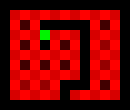

In [6]:
example = random.randrange(x_train.shape[0])

input_data = np.array([x_train[example]])


prediction = model.predict(input_data)

# print input data
input_data_print = x_train[example,:,:,0] * 100
input_data_print = input_data_print.astype(np.uint8)
print("input: ")
print(input_data_print)

# generate greyscale image data from input data
target_imgdata = x_train[example,:,:,0] * 255
target_imgdata = target_imgdata.astype(np.uint8)

# print prediction
prediction_data_print = prediction[0,:,:,1] * 100 
prediction_data_print = prediction_data_print.astype(np.uint8)
print("prediction: ")
print(prediction_data_print)

# generate greyscale image data from prediction data
prediction_imgdata = prediction[0] * 255
prediction_imgdata = prediction_imgdata.astype(np.uint8)

# merge image data in color channels
tmp = np.zeros((prediction[0].shape[0], prediction[0].shape[1]), dtype=np.uint8)
merged_imgdata = np.stack([target_imgdata, prediction_imgdata[:,:,1], tmp], axis=2)

#create image
img = Image.fromarray(merged_imgdata, 'RGB')
img = img.resize(size=(img.size[0]*10, img.size[1]*10))

img